# Lecture 2: Data Sources

### Zhentao Shi

kernel: base (python 3.11.3)

* Online archives
* API (Application Programming Interface)
* Proprietary data
* Survey data

## Public data

* Time Series
  - Natural ordering of observations
  - A single realization in history
  - eg. GDP, stock prices

* Microeconomic data
  - No natural ordering
  - Collected at the same time, or time does not matter
  - [Auction data](https://capcp.la.psu.edu/data-and-software/alaska-oil-and-gas-auction-data/)

* Aggregate panel data
  - [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)
  - [Atlas Trade Data](https://atlas.cid.harvard.edu/about-data)
  - [IMF databases](https://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329132316)

## Gated Data

* Applications needed
  * Chinese Longitudinal Healthy Longevity Survey [link](https://www.icpsr.umich.edu/web/NACDA/studies/36692)
  * China Household Finance Survey [link](https://chfs.swufe.edu.cn/)


## CUHK Library

* [LSEG (formerly Refinitiv)](http://easyaccess1.lib.cuhk.edu.hk/limited/refinitiv.html)
* [WRDS](http://easyaccess1.lib.cuhk.edu.hk/limited/wrds.htm)
* [CEIC](https://cas-ceicdata-com.easyaccess1.lib.cuhk.edu.hk/login#)


## Econ Department

* WIND
* CEIC
* Bloomberg
* China Census

## Time Series

- Macroeconomics
  - China's [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
  - Federal Reserve [FRED database](https://research.stlouisfed.org/econ/mccracken/fred-databases/)
- Financial
  - [Yahoo Finance](https://finance.yahoo.com/)

## HK GDP

* [Census and Statistics Department](https://www.censtatd.gov.hk/en/web_table.html?id=33#)
  * Webpage With API

In [2]:
import requests
import pandas as pd
import json
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np


We load requests, pandas, json, pandas_datareader, matplotlib, and numpy so the notebook can fetch remote data, manipulate tables, and create plots.


This block calls the Hong Kong Census and Statistics Department API, converts the JSON payload to a pandas DataFrame, and displays the table so we can inspect the structured response.


## Federal Reserve

* China GDP [[link](https://fred.stlouisfed.org/series/MKTGDPCNA646NWDB)]

* [DataReader](https://pydata.github.io/pandas-datareader/devel/remote_data.html) provides direct online access.

            MKTGDPCNA646NWDB
DATE                        
2022-01-01      1.831677e+13
2023-01-01      1.827036e+13
2024-01-01      1.874380e+13


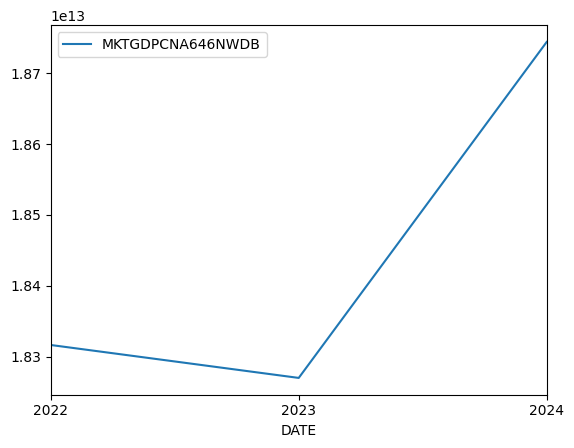

In [4]:
data = pdr.get_data_fred('MKTGDPCNA646NWDB')
print(data)
data.plot()
plt.show()

Using pandas_datareader, we download the World Bank GDP series from FRED, print the raw values, and plot the time series to visualize long run growth.



Another example: [Quarterly US Industrial Production Index](https://fred.stlouisfed.org/series/IPB50001SQ)


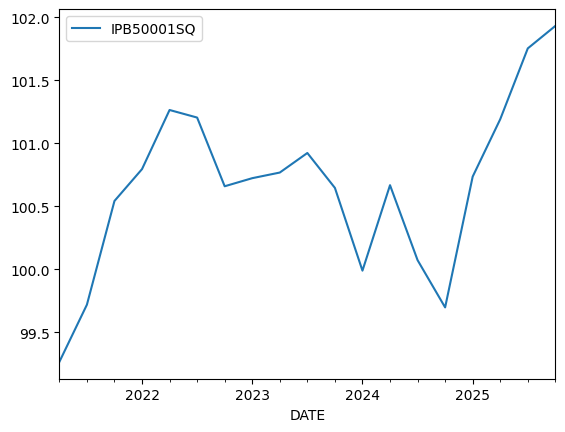

In [3]:
data = pdr.get_data_fred('IPB50001SQ')
data.plot()
plt.show()


Here we pull the US industrial production index from FRED and immediately plot it, giving a quick view of cyclical movements in manufacturing.


## Finance Data


* [Yahoo Finance](https://finance.yahoo.com/)

* Tick `AAPL` for *Apple Inc.* 

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2026-01-12  260.250000  261.299988  256.799988  259.160004  45263800
2026-01-13  261.049988  261.809998  258.390015  258.720001  45730800
2026-01-14  259.959991  261.820007  256.709991  259.489990  40019400
2026-01-15  258.209991  261.040009  257.049988  260.649994  39388600
2026-01-16  255.529999  258.899994  254.929993  257.899994  72018600


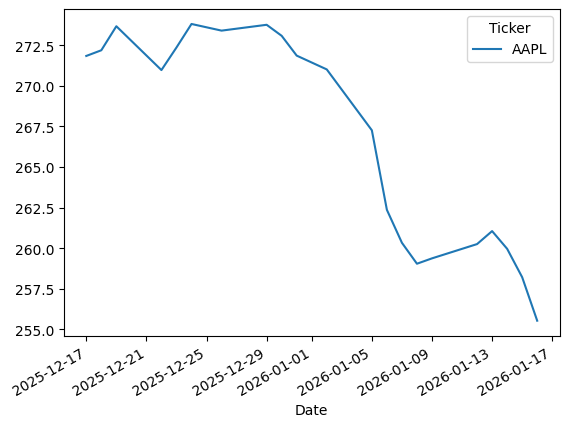

In [4]:
import yfinance as yf

data = yf.download('AAPL')
print(data.tail())
data['Close'].plot()
plt.show()

The yfinance download brings in historical Apple prices, shows the most recent observations, and plots the closing price to illustrate the equity trend.


### Shanghai Composite Index

[*********************100%***********************]  1 of 1 completed


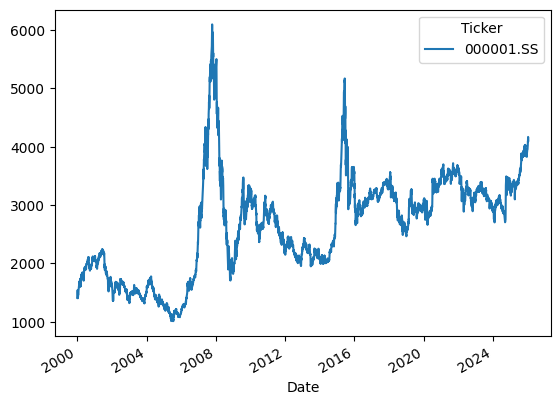

In [5]:
data = yf.download("000001.SS", start='2000-01-01')
data['Close'].plot()
plt.show()

In [6]:
data

Price,Close,High,Low,Open,Volume
Ticker,000001.SS,000001.SS,000001.SS,000001.SS,000001.SS
Date,,,,,
2000-01-04,1406.370972,1407.517944,1361.213989,1368.692993,0
2000-01-05,1409.682007,1433.780029,1398.322998,1407.828979,0
2000-01-06,1463.942017,1463.954956,1400.253052,1406.036011,0
2000-01-07,1516.604004,1522.824951,1477.154053,1477.154053,0
2000-01-10,1545.112061,1546.723022,1506.404053,1531.712036,0
...,...,...,...,...,...
2026-01-12,4165.287109,4168.356934,4119.878906,4134.893066,839500
2026-01-13,4138.757812,4179.702148,4126.233887,4169.704102,868400


We repeat the yfinance request for the Shanghai Composite Index and plot the closing levels to compare mainland equity dynamics.


### 000001.SS Return

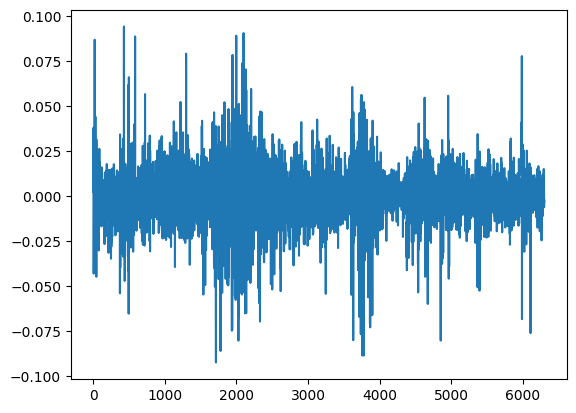

In [14]:
import numpy as np

SH = data['Close']
SH_diff = np.diff(np.log(SH), axis=0)

plt.plot(SH_diff)
plt.show()

By taking log differences of the Shanghai Composite closes, we approximate daily returns and plot them to highlight volatility rather than price levels.


### Cryptocurrencies

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


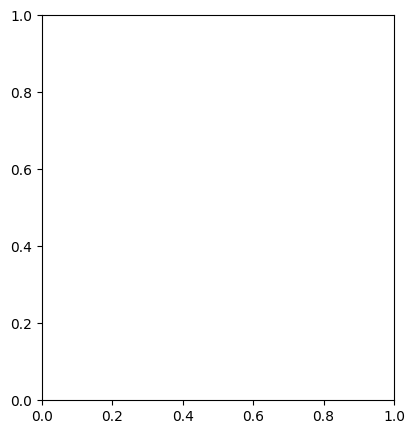

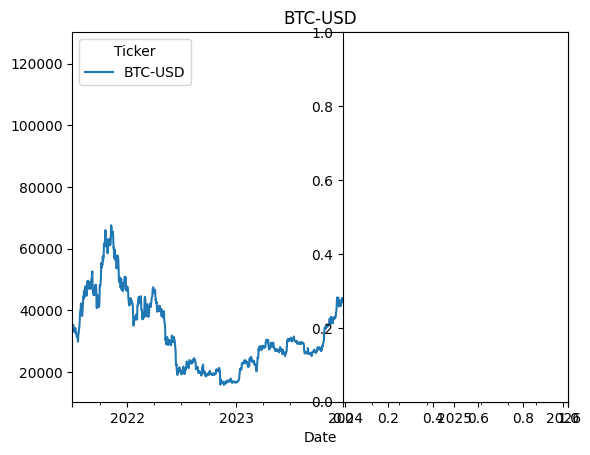

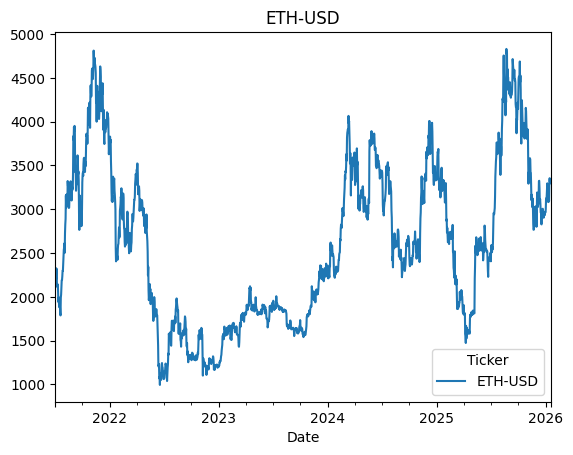

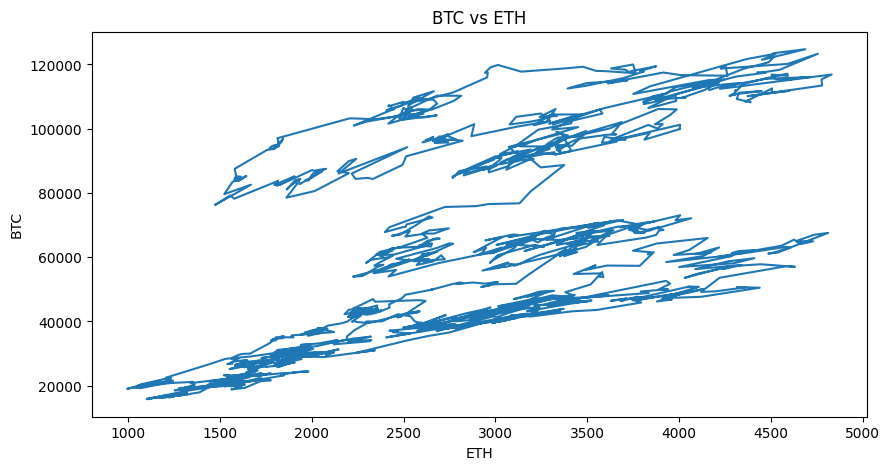

In [15]:
BTC = yf.download('BTC-USD', start='2021-07-01')['Close']
ETH = yf.download('ETH-USD', start='2021-07-01')['Close']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
BTC.plot()
plt.title('BTC-USD')

plt.subplot(1, 2, 2)
ETH.plot()
plt.title('ETH-USD')

plt.figure(figsize=(10, 5))
plt.plot(ETH.values, BTC.values)
plt.xlabel('ETH')
plt.ylabel('BTC')
plt.title('BTC vs ETH')
plt.show()

This section downloads BTC and ETH prices, plots each series in separate panels, and adds a scatter plot to compare the two assets co-movement.


## Repeated Data Download

* Example: HKMA [API](https://apidocs.hkma.gov.hk/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
  * Save as a csv file
  * Repeat the regular job via `cron` in Linux

In [16]:
url = "https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity"
response = requests.get(url)
data = response.json()

hkma = pd.DataFrame(data['result'])
hkma.to_csv('hkma.csv', index=False)

The code queries the HKMA market data API, converts the JSON result into a DataFrame, and saves the snapshot to 'hkma.csv' for offline use.


## Access Database

* API for CEIC

### Bank Marketing Data


* Direct marketing campaigns of a Portuguese banking institution. 


* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, GuimarÃ£es, Portugal, October, 2011. EUROSIS.

In [17]:
import pandas as pd

# Read the CSV file
d0 = pd.read_csv('data_example/bank-full.csv', delimiter=';', 
                 dtype={'age': int, 'job': str, 'balance': int})

# Display the first few rows
print(d0.head())

# Display the column names
print(d0.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

We load the bank marketing CSV, specifying column types, then peek at the first rows and column names to understand the available fields.


## Data Transformation

* pick out a subset of rows that satisfies some conditions
* pick out a subset of columns
* order rows. Default ordering is from low to high
* add columns produced by the existing ones

In [18]:
# Select columns
d1 = d0.loc[:, 'age':'housing']
d1.head()

,age,job,marital,education,default,balance,housing
0,58,management,married,tertiary,no,2143,yes
1,44,technician,single,secondary,no,29,yes
2,33,entrepreneur,married,secondary,no,2,yes
3,47,blue-collar,married,unknown,no,1506,yes
4,33,unknown,single,unknown,no,1,no


Selecting the columns from 'age' through 'housing' creates a narrower view of the data, and the final line previews the resulting subset.


In [ ]:
d1.head(5)

Calling head(5) again reiterates the first five rows after the column selection to confirm the transformation.


In [ ]:
d1.iloc[9:20]

Using iloc[9:20] pulls a slice of observations 9 through 19 so we can inspect a specific window of records.


In [ ]:
# Select a subset by conditions
d1[(d1['job'] == 'blue-collar') & (d1['age'] > 50)]


The boolean filter keeps only blue collar clients older than 50, showing how to apply multiple conditions on a single column.


In [ ]:
d1[(d1['job'] == 'blue-collar') & (d1['age'] > 20) & (d1['age'] <= 30)]

A similar filter isolates blue collar clients between ages 21 and 30 inclusive, illustrating compound range criteria.


In [ ]:
# (re)arrange rows
d1.sort_values(['age', 'education'])

Sorting by age and education orders the DataFrame to make patterns across demographics easier to read.


In [ ]:
d1.sort_values(['age', 'education'], ascending=[False, True])

Here we sort by age descending and education ascending, demonstrating how to control sort direction per column.


In [ ]:
# Add generated columns (last column)
d1['edu_f'] = d1['education'].astype('category').cat.codes
d1.head()

Converting 'education' to categorical codes creates a numeric feature edu_f that can be fed into models while preserving category structure.


In [ ]:
# Create new dataframe with specified columns
d1_transmuted = d1[['age', 'marital', 'education']].copy()

d1_transmuted['marital'] = d1_transmuted['marital'].astype('category').cat.codes
d1_transmuted['education'] = d1_transmuted['education'].astype('category').cat.codes
d1_transmuted.head()

We build a new DataFrame of select columns and encode the categorical fields as integers, preparing a tidy feature matrix.


In [ ]:
# Convert the integer columns to strings so that they become dummy variables
d1_dummy = d1_transmuted.copy()
d1_dummy['marital'] = d1_dummy['marital'].astype(str)
d1_dummy['education'] = d1_dummy['education'].astype(str)

# Create dummy variables for all columns
dummies = pd.get_dummies(d1_dummy, columns=['marital', 'education'])
dummies.head()

Casting the encoded columns to strings and applying get_dummies produces one hot encoded dummy variables for downstream modeling.


## Summarize

* `group_by`

In [ ]:
# Overall mean balance
mean_b = d1['balance'].mean()
print(f'Mean Balance: {mean_b}')

Computing the mean balance gives a single summary metric that describes the typical account size across all clients.


In [ ]:
# Mean balance by groups
mean_balance_by_education = d1.groupby('education')['balance'].mean()
print(mean_balance_by_education)

Grouping by education and taking the mean shows how average balances differ by schooling level.


In [ ]:
# Mean, standard deviation and count by groups
grouped = d1.groupby(['education', 'marital'])
summary = grouped['balance'].agg(['mean', 'std', 'count'])
summary.columns = ['mean_b', 'sd_b', 'count_n']
print(summary)

Aggregating by education and marital status with mean, standard deviation, and count provides a richer summary of balance distributions across demographic segments.
